<a href="https://colab.research.google.com/github/SanjanaBoggaram/my-first-opensource-contribution/blob/main/happi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
df = pd.read_csv("/content/drive/MyDrive/Happiest_Minds/DataCoSupplyChainDataset.csv" , encoding='ISO-8859-1')

In [5]:
# df=df[['Longitude','Latitude','Market','Order Region','Order Country','Order State','Order City','Order Zipcode']]

In [6]:
df.head(10)

,Longitude,Latitude,Market,Order Region,Order Country,Order State,Order City,Order Zipcode
0,-66.037056,18.251453,Pacific Asia,Southeast Asia,Indonesia,Java Occidental,Bekasi,NaN
1,-66.037064,18.279451,Pacific Asia,South Asia,India,Rajastán,Bikaner,NaN
2,-121.881279,37.292233,Pacific Asia,South Asia,India,Rajastán,Bikaner,NaN
3,-118.291016,34.125946,Pacific Asia,Oceania,Australia,Queensland,Townsville,NaN
4,-66.037048,18.253769,Pacific Asia,Oceania,Australia,Queensland,Townsville,NaN
5,-78.879066,43.013969,Pacific Asia,Oceania,Australia,Queensland,Toowoomba,NaN
6,-66.037056,18.242538,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
7,-80.162872,25.928869,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
8,-66.037056,18.233223,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
9,-121.966629,37.773991,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN


In [7]:
print(df[df['Order Region'] == 'Eastern Asia'])

         Longitude   Latitude        Market  Order Region Order Country  \
6       -66.037056  18.242538  Pacific Asia  Eastern Asia         China   
7       -80.162872  25.928869  Pacific Asia  Eastern Asia         China   
8       -66.037056  18.233223  Pacific Asia  Eastern Asia         China   
9      -121.966629  37.773991  Pacific Asia  Eastern Asia         China   
10      -66.037056  18.282845  Pacific Asia  Eastern Asia         Japón   
...            ...        ...           ...           ...           ...   
180511 -117.073662  32.611141  Pacific Asia  Eastern Asia         China   
180512  -66.370621  18.245256  Pacific Asia  Eastern Asia         China   
180513  -82.599297  39.715977  Pacific Asia  Eastern Asia         China   
180514  -73.942711  40.640930  Pacific Asia  Eastern Asia         China   
180515 -119.018700  35.362545  Pacific Asia  Eastern Asia         Japón   

       Order State Order City  Order Zipcode  
6        Guangdong  Guangzhou            NaN  
7    

Market>Order Region>Order Country>Order State>Order City

In [8]:
print(df['Order City'].unique())

['Bekasi' 'Bikaner' 'Townsville' ... 'Tongling' 'Liuyang' 'Nashua']


In [9]:
print(df['Order City'].value_counts())


Order City
Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Detmold             1
Korhogo             1
Samalut             1
Libourne            1
Wendeng             1
Name: count, Length: 3597, dtype: int64


In [10]:
coor = pd.read_csv("/content/drive/MyDrive/Happiest_Minds/World_Cities_Location_table.csv", delimiter=';')

In [11]:
coor.head(10)

,Row,Country,City,Latitude,Longitude,Altitude
0,1,Afghanistan,Kabul,34.516667,69.183334,1808.0
1,2,Afghanistan,Kandahar,31.610000,65.699997,1015.0
2,3,Afghanistan,Mazar-e Sharif,36.706944,67.112221,369.0
3,4,Afghanistan,Herat,34.340000,62.189999,927.0
4,5,Afghanistan,Jalalabad,34.420000,70.449997,573.0
5,6,Afghanistan,Konduz,36.720000,68.860001,394.0
6,7,Afghanistan,Ghazni,33.553555,68.426888,2175.0
7,8,Afghanistan,Balkh,36.758611,66.896111,328.0
8,9,Afghanistan,Baghlan,36.120000,68.699997,565.0
9,10,Afghanistan,Gardez,33.590000,69.220001,2279.0


In [12]:
coor = coor[['Country','City', 'Latitude', 'Longitude']]


In [13]:
coor.head(10)

,Country,City,Latitude,Longitude
0,Afghanistan,Kabul,34.516667,69.183334
1,Afghanistan,Kandahar,31.610000,65.699997
2,Afghanistan,Mazar-e Sharif,36.706944,67.112221
3,Afghanistan,Herat,34.340000,62.189999
4,Afghanistan,Jalalabad,34.420000,70.449997
5,Afghanistan,Konduz,36.720000,68.860001
6,Afghanistan,Ghazni,33.553555,68.426888
7,Afghanistan,Balkh,36.758611,66.896111
8,Afghanistan,Baghlan,36.120000,68.699997
9,Afghanistan,Gardez,33.590000,69.220001


In [14]:
city_df = df[['Order Country','Order City']].drop_duplicates().reset_index(drop=True)


In [15]:
city_df.head(5)

,Order Country,Order City
0,Indonesia,Bekasi
1,India,Bikaner
2,Australia,Townsville
3,Australia,Toowoomba
4,China,Guangzhou


In [16]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Country  3665 non-null   object
 1   Order City     3665 non-null   object
dtypes: object(2)
memory usage: 57.4+ KB


In [17]:
!pip install thefuzz[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.2 MB/s eta 0:00:00


In [18]:
from thefuzz import process
import pandas as pd


In [19]:
# Drop exact duplicates (all columns same)
coor= coor.drop_duplicates(subset=['City'])

# OR: Drop duplicates by City, keeping the first entry only (even if other columns differ)
coor= coor.drop_duplicates(subset='City', keep='first')


In [20]:
# Create a function to get best match from coor['City']
def get_best_match(city, choices, threshold=70):
    match, score = process.extractOne(city, choices)
    return match if score >= threshold else None

# Apply matching
choices = coor['City'].dropna().unique()
city_df['Matched City'] = city_df['Order City'].apply(lambda x: get_best_match(x, choices))

# Merge using matched city
merged_df = city_df.merge(coor, left_on='Matched City', right_on='City', how='left')

# Summary
matched = merged_df['City'].notna().sum()
unmatched = merged_df['City'].isna().sum()

print(f"✅ Matched: {matched}\n❌ Unmatched: {unmatched}")


✅ Matched: 3656
❌ Unmatched: 9


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Country  3665 non-null   object 
 1   Order City     3665 non-null   object 
 2   Matched City   3656 non-null   object 
 3   Country        3665 non-null   object 
 4   City           3656 non-null   object 
 5   Latitude       3665 non-null   float64
 6   Longitude      3665 non-null   float64
dtypes: float64(2), object(5)
memory usage: 200.6+ KB


In [21]:
dupes = coor['City'].value_counts()
dupes = dupes[dupes > 1]
print(dupes)


Series([], Name: count, dtype: int64)


In [41]:
# Check some duplicate groups
coor[coor['City'].isin(coor['City'][coor['City'].duplicated()])].sort_values('City').head(20)


,City,Latitude,Longitude
7268,Abuja,9.175833,7.180833
7231,Abuja,9.083333,7.533333
5469,Alexandria,18.300000,-77.349998
8259,Alexandria,43.983333,25.333334
8910,Anyang,37.392500,126.926941
2296,Anyang,36.099444,114.328888
524,Armavir,40.152222,44.030834
8392,Armavir,44.980000,41.119999
8439,Armenia,13.743611,-89.498886
2353,Armenia,4.533889,-75.681114


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Country  3665 non-null   object 
 1   Order City     3665 non-null   object 
 2   Matched City   3656 non-null   object 
 3   Country        3665 non-null   object 
 4   City           3656 non-null   object 
 5   Latitude       3665 non-null   float64
 6   Longitude      3665 non-null   float64
dtypes: float64(2), object(5)
memory usage: 200.6+ KB


In [25]:
merged_df['Order City'].value_counts()

,count
Order City,
Cambridge,3
Valencia,3
Hamilton,3
Toledo,3
Laval,2
...,...
Altamira,1
Mexicali,1
Ponte Nova,1


In [43]:
merged_df[merged_df['Order City'] == 'Bangalore']

,Order Country,Order City,Matched City,Country,City,Latitude,Longitude
21,India,Bangalore,Mangalore,India,Mangalore,12.866667,74.883331


In [33]:
# Get unmatched city names as a list
unmatched_list = merged_df[merged_df['City'].isna()]['Order City'].unique().tolist()

# Print the list
print(unmatched_list)


['Yiwu', 'Quixadá', 'Jixi', 'Guzmán', 'Redwood City', 'Firminy', 'Clydach', 'Teziutlán', 'Jizzakh']


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3656 entries, 0 to 3655
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order Country  3656 non-null   object 
 1   Order City     3656 non-null   object 
 2   Matched City   3656 non-null   object 
 3   Country        3656 non-null   object 
 4   City           3656 non-null   object 
 5   Latitude       3656 non-null   float64
 6   Longitude      3656 non-null   float64
dtypes: float64(2), object(5)
memory usage: 200.1+ KB


In [35]:
# Drop rows where Matched City is null
merged_df = merged_df[merged_df['Matched City'].notna()].reset_index(drop=True)


In [33]:
print("merged_df shape:", merged_df.shape)
print("merged_df sample:")
print(merged_df.head())



merged_df shape: (3905, 6)
merged_df sample:
   Order City Matched City    Country        City   Latitude   Longitude
0      Bekasi       Bekasi  Indonesia      Bekasi  -6.236667  106.991943
1     Bikaner      Bikaner      India     Bikaner  28.016667   73.300003
2  Townsville   Townsville  Australia  Townsville -19.250000  146.800003
3   Toowoomba    Toowoomba  Australia   Toowoomba -27.550000  151.966659
4   Guangzhou    Guangzhou      China   Guangzhou  23.116667  113.250000


In [34]:
city_df.head()

,Order City,Matched City
0,Bekasi,Bekasi
1,Bikaner,Bikaner
2,Townsville,Townsville
3,Toowoomba,Toowoomba
4,Guangzhou,Guangzhou


In [46]:
final_df = df.merge(
    merged_df[['Order City', 'Order Country', 'Latitude', 'Longitude']],
    on=['Order City', 'Order Country'],
    how='left'
)

# View summary
#print(f"✅ Successfully added coordinates to {final_df['Latitude'].notna().sum()} rows.")
#print(f"❌ Missing coordinates for {final_df['Latitude'].isna().sum()} rows.")

# Optional: preview
final_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Latitude_y,Longitude_y
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,-6.236667,106.991943
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,28.016667,73.300003
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,28.016667,73.300003
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,-19.250000,146.800003
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,-19.250000,146.800003


In [38]:
df.head(10)

,Longitude,Latitude,Market,Order Region,Order Country,Order State,Order City,Order Zipcode
0,-66.037056,18.251453,Pacific Asia,Southeast Asia,Indonesia,Java Occidental,Bekasi,NaN
1,-66.037064,18.279451,Pacific Asia,South Asia,India,Rajastán,Bikaner,NaN
2,-121.881279,37.292233,Pacific Asia,South Asia,India,Rajastán,Bikaner,NaN
3,-118.291016,34.125946,Pacific Asia,Oceania,Australia,Queensland,Townsville,NaN
4,-66.037048,18.253769,Pacific Asia,Oceania,Australia,Queensland,Townsville,NaN
5,-78.879066,43.013969,Pacific Asia,Oceania,Australia,Queensland,Toowoomba,NaN
6,-66.037056,18.242538,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
7,-80.162872,25.928869,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
8,-66.037056,18.233223,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN
9,-121.966629,37.773991,Pacific Asia,Eastern Asia,China,Guangdong,Guangzhou,NaN


In [47]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

# Apply the function row-wise
final_df['Distance'] = haversine(
    final_df['Latitude_x'],
    final_df['Longitude_x'],
    final_df['Latitude_y'],
    final_df['Longitude_y']
)

# Optional: Show a quick preview
final_df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Latitude_y,Longitude_y,Distance
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,-6.236667,106.991943,18480.083668
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,28.016667,73.300003,13259.386834
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,28.016667,73.300003,12582.236838
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,-19.250000,146.800003,11629.468711
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,-19.250000,146.800003,16560.905094


In [48]:
final_df.rename(columns={
    'Longitude_x': 'Store Longitude',
    'Latitude_x': 'Store Latitude',
    'Latitude_y': 'Order Latitude',
    'Longitude_y': 'Order Longitude'
}, inplace=True)


In [49]:
final_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Order Latitude,Order Longitude,Distance
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,-6.236667,106.991943,18480.083668
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,28.016667,73.300003,13259.386834
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,28.016667,73.300003,12582.236838
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,-19.250000,146.800003,11629.468711
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,-19.250000,146.800003,16560.905094


In [50]:
final_df = final_df[final_df['Order Latitude'].notna()].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [51]:
# Drop rows where Matched City is null
final_df = final_df[final_df['Order Latitude'].notna()].reset_index(drop=True)

final_df = final_df[final_df['Order Longitude'].notna()].reset_index(drop=True)

In [52]:
final_df = final_df[final_df['Order Latitude'].notna()].reset_index(drop=True)

In [53]:
final_df['shipment_delay'] = final_df['Days for shipping (real)'] - final_df['Days for shipment (scheduled)']


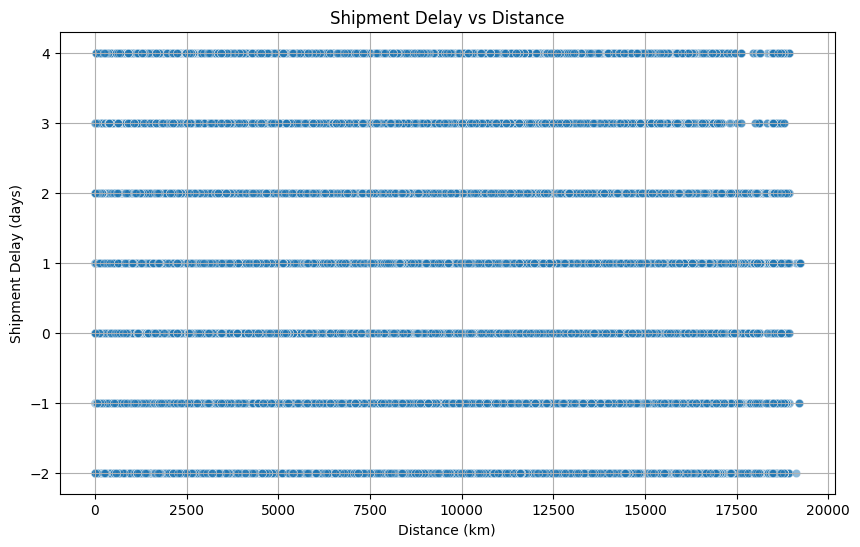

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Distance', y='shipment_delay', alpha=0.5)
plt.title('Shipment Delay vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Shipment Delay (days)')
plt.grid(True)
plt.show()


In [55]:
# Correlation
correlation = final_df[['Distance', 'shipment_delay']].corr()
print(correlation)


                Distance  shipment_delay
Distance        1.000000        0.005523
shipment_delay  0.005523        1.000000


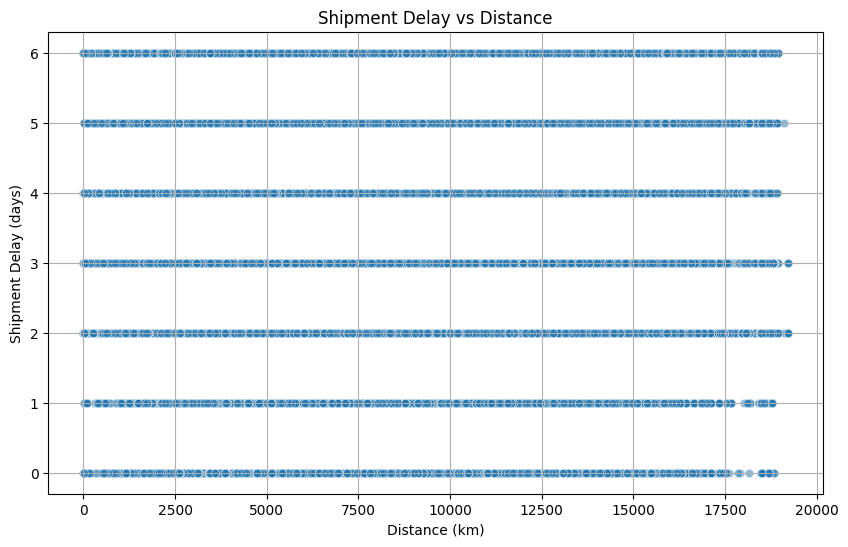

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Distance', y='Days for shipping (real)', alpha=0.5)
plt.title('Shipment Delay vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Shipment Delay (days)')
plt.grid(True)
plt.show()


In [57]:
# Correlation
correlation = final_df[['Distance', 'Days for shipping (real)']].corr()
print(correlation)


                          Distance  Days for shipping (real)
Distance                  1.000000                  0.001081
Days for shipping (real)  0.001081                  1.000000
